In [2]:
df <- read.csv("E:/Machine Learning/Datasets/House_Price.csv", header=TRUE)
dim(df)

[1] 506  19

In [3]:
summary(df)

     price         crime_rate         resid_area       air_qual     
 Min.   : 5.00   Min.   : 0.00632   Min.   :30.46   Min.   :0.3850  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:35.19   1st Qu.:0.4490  
 Median :21.20   Median : 0.25651   Median :39.69   Median :0.5380  
 Mean   :22.53   Mean   : 3.61352   Mean   :41.14   Mean   :0.5547  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.:48.10   3rd Qu.:0.6240  
 Max.   :50.00   Max.   :88.97620   Max.   :57.74   Max.   :0.8710  
                                                                    
    room_num          age             dist1            dist2       
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 0.920  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940  
 Median :6.208   Median : 77.50   Median : 3.385   Median : 3.010  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.972   Mean   : 3.629  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992  
 Max.   :8.780   Max.   :100.00   Max.  

From the analysis we can conclude that there is skewness or outlier issues in three columns i.e. 'crime_rate', 'n_hot_rooms' and 'rainfall'

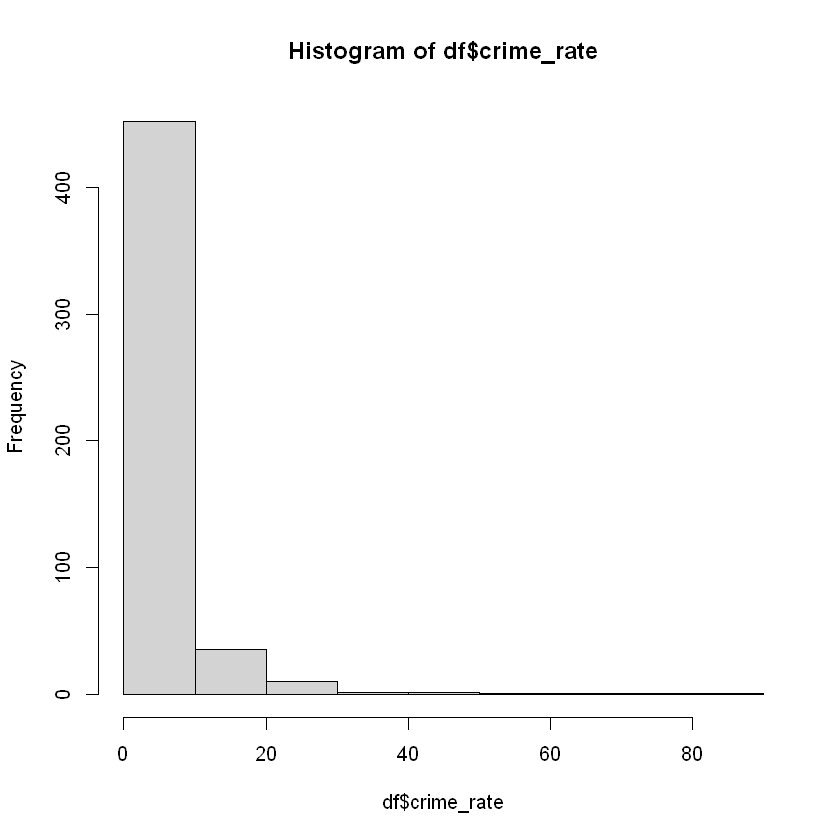

In [4]:
hist(df$crime_rate)

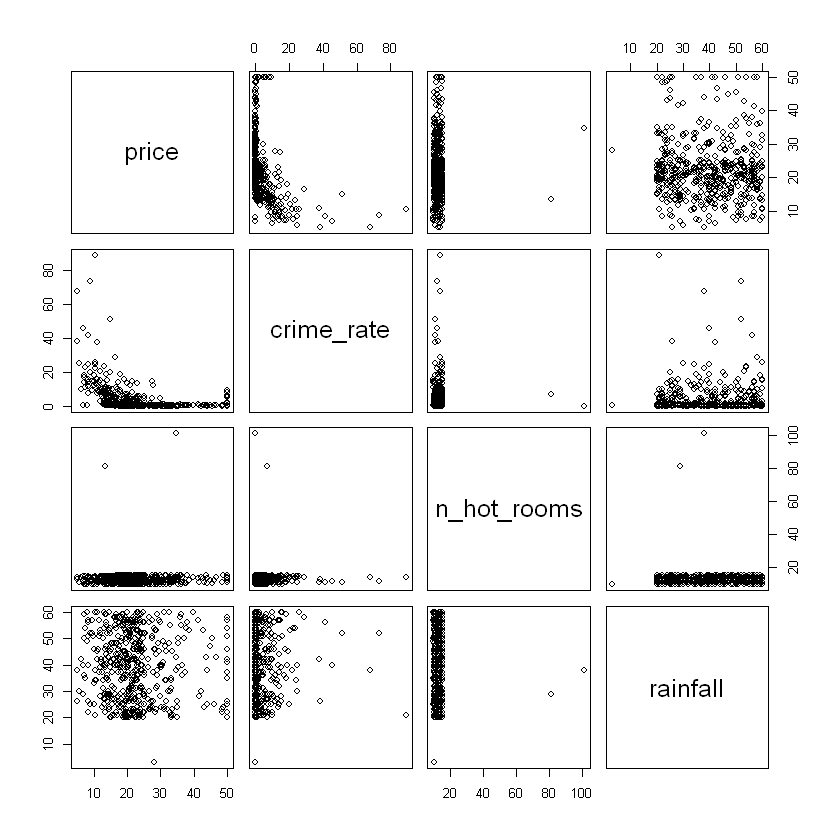

In [5]:
# Scatterplot for outliers
pairs(~price+crime_rate+n_hot_rooms+rainfall, data=df)

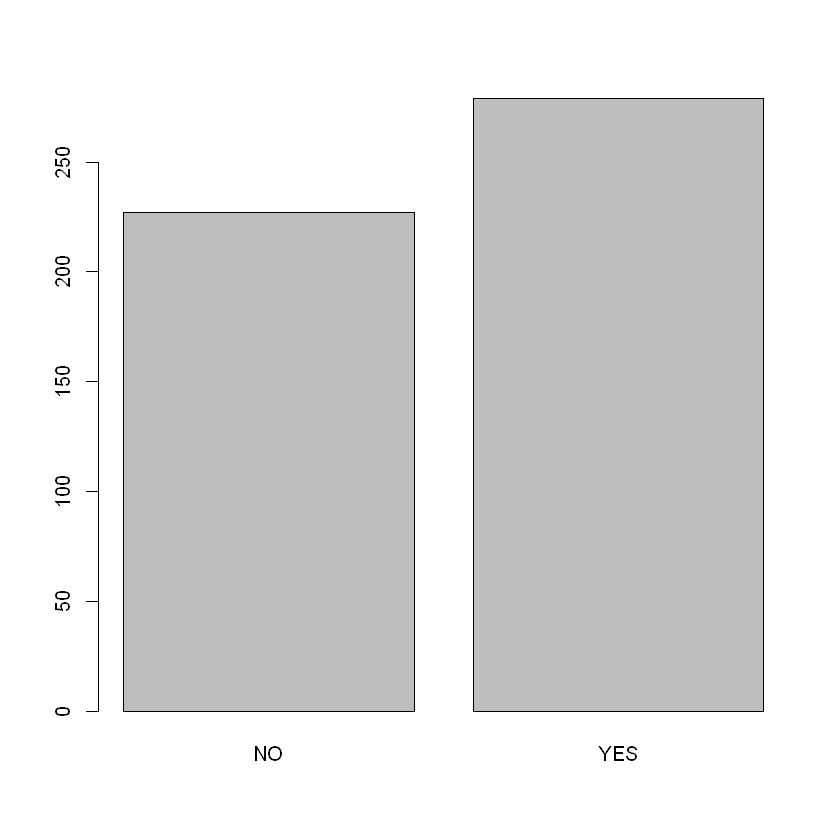

In [6]:
barplot(table(df$airport))

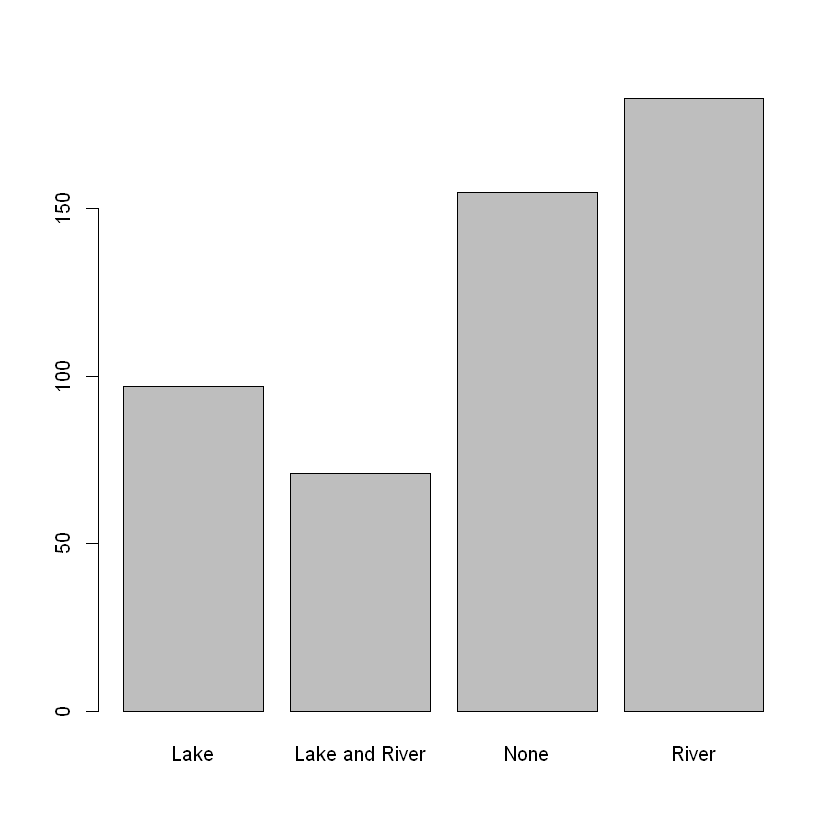

In [7]:
barplot(table(df$waterbody))

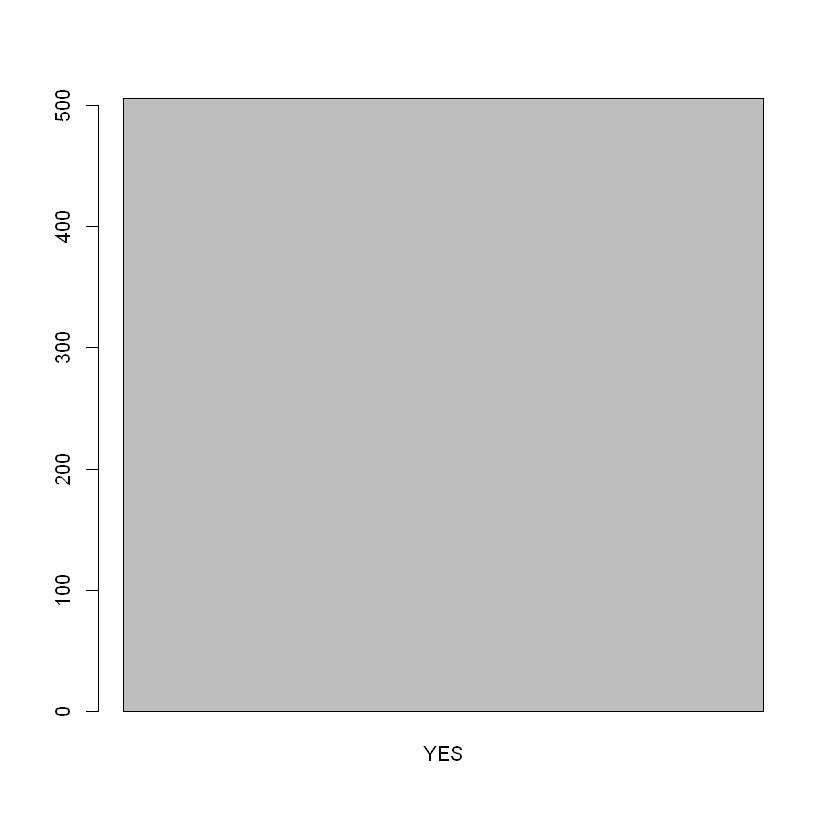

In [8]:
barplot(table(df$bus_ter))

* n_hot_rooms and rainfall are outliers
* n_hos_beds has missing values
* bus_ter is a useless variable since it has only one value
* crime_rate has some other functional relationship with price

In [9]:
#removing bus_ter since it has same value throughout
df <- df[,-18]

# Outlier Treatment

In [10]:
# We use capping and flooring method. 3xP99 for n_hot_rooms and 0.3xP1 for rainfall
quantile(df$n_hot_rooms,0.99)
UV = 3*quantile(df$n_hot_rooms,0.99)
df$n_hot_rooms[df$n_hot_rooms>UV] <- UV
summary(df$n_hot_rooms)

99% 
15.39952

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.06   11.19   12.72   12.86   14.17   46.20 

In [11]:
quantile(df$rainfall,0.01)
MN = 0.33*quantile(df$rainfall,0.01)
df$rainfall[df$rainfall>MN] <- MN
summary(df$rainfall)

1% 
20

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.600   6.600   6.593   6.600   6.600 

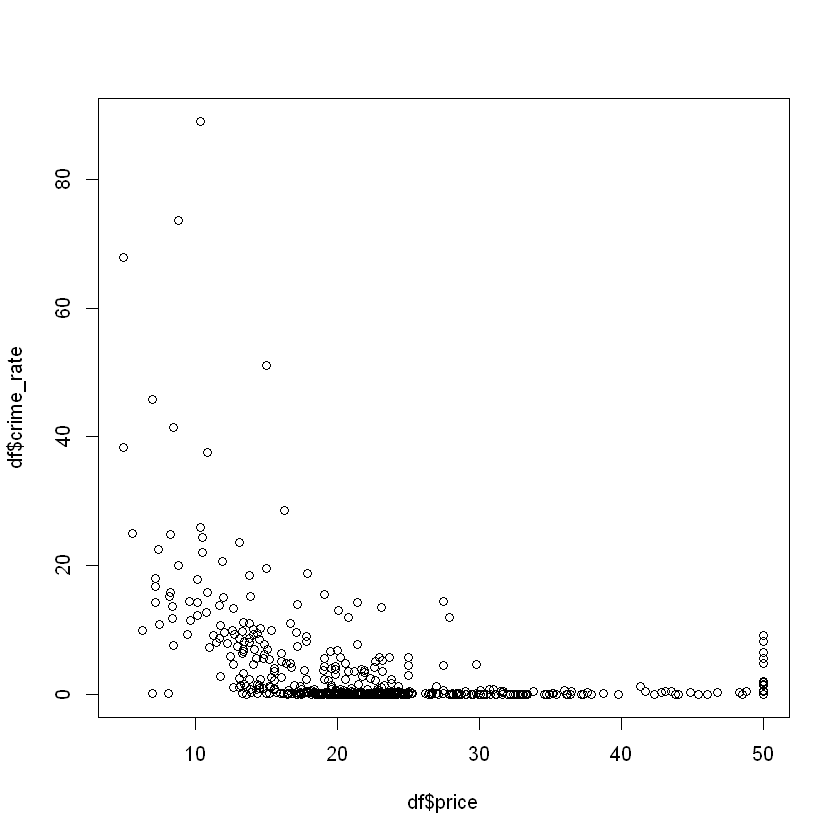

In [12]:
#  Now we find relationship between price and crime_rate
plot(df$price, df$crime_rate)

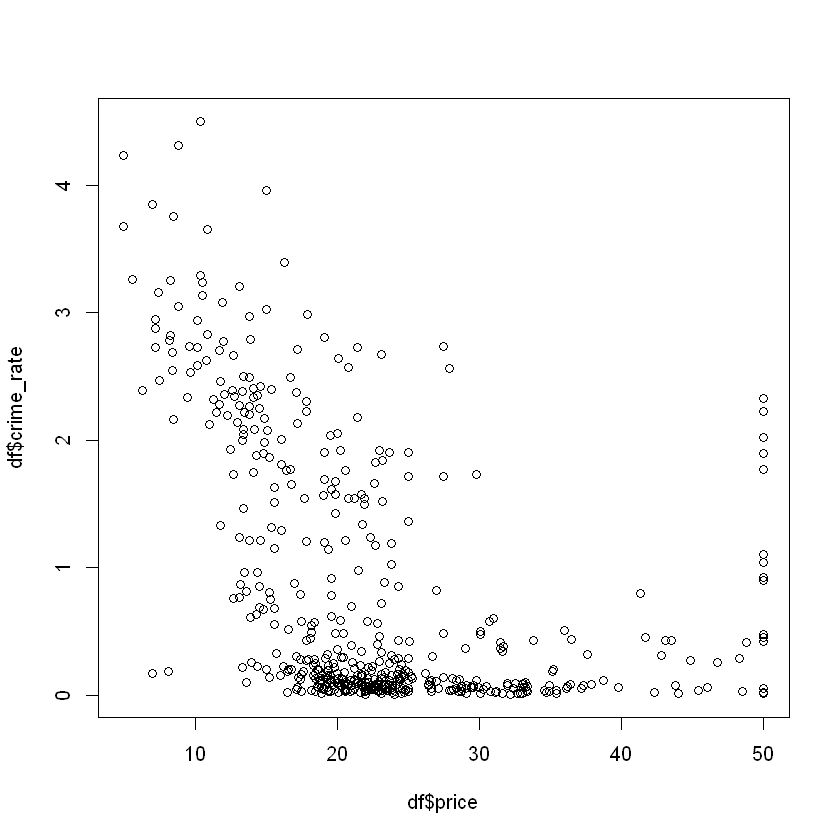

In [13]:
# The relationship seems to be logarithmic
df$crime_rate <- log(1+df$crime_rate)
plot(df$price, df$crime_rate)

Now the relation is somewhat linear

In [14]:
# As shown in the dataset, there are four dist variables. Instead of getting a seperate relation for each, we find mean of all four to get a single variable
df$avg_dist <- (df$dist1 + df$dist2 + df$dist3 + df$dist4)/4
View(df)

price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
24.0,0.006300113,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,6.6,0.04934731,4.0875
21.6,0.026943735,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,6.6,0.04614563,4.9675
34.7,0.026924267,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,6.6,0.04576397,4.9675
33.4,0.031857130,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,6.6,0.04715060,6.0650
36.2,0.066770404,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,6.6,0.03947400,6.0625
28.7,0.029413161,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.22960,None,6.6,0.04590965,6.0600
22.9,0.084607657,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.18320,River,6.6,0.05216991,5.5600
22.1,0.135011547,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.17680,Lake,6.6,0.05707490,5.9500
16.5,0.191644628,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.13200,None,6.6,0.05630250,6.0825


In [15]:
df <- df[, -7:-10] #removing all dist variables from columns 7 to 10

# Dummy Variable Creation

In [16]:
library(fastDummies)
df <- dummy_cols(df, select_columns = "airport")
df <- dummy_cols(df, select_columns = "waterbody")
View(df)

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,⋯,waterbody,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
24.0,0.006300113,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,⋯,River,6.6,0.04934731,4.0875,0,1,0,0,0,1
21.6,0.026943735,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,⋯,Lake,6.6,0.04614563,4.9675,1,0,1,0,0,0
34.7,0.026924267,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,⋯,None,6.6,0.04576397,4.9675,1,0,0,0,1,0
33.4,0.031857130,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,⋯,Lake,6.6,0.04715060,6.0650,0,1,1,0,0,0
36.2,0.066770404,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,⋯,Lake,6.6,0.03947400,6.0625,1,0,1,0,0,0
28.7,0.029413161,32.18,0.458,6.430,58.7,21.3,5.21,YES,7.174,⋯,None,6.6,0.04590965,6.0600,0,1,0,0,1,0
22.9,0.084607657,37.87,0.524,6.012,66.6,24.8,12.43,YES,6.958,⋯,River,6.6,0.05216991,5.5600,0,1,0,0,0,1
22.1,0.135011547,37.87,0.524,6.172,96.1,24.8,19.15,NO,5.842,⋯,Lake,6.6,0.05707490,5.9500,1,0,1,0,0,0
16.5,0.191644628,37.87,0.524,5.631,100.0,24.8,29.93,YES,5.930,⋯,None,6.6,0.05630250,6.0825,0,1,0,0,1,0


In [18]:
# Since we need n-1 variables, we delete non required variables 'airportNO' and 'waterbody_Lake and River'
df <- df[,-17]
df <- df[,-18]
View(df)

price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist,airport_NO,waterbody_None
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
24.0,0.006300113,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,6.6,0.04934731,4.0875,0,0
21.6,0.026943735,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,6.6,0.04614563,4.9675,1,0
34.7,0.026924267,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,6.6,0.04576397,4.9675,1,1
33.4,0.031857130,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,6.6,0.04715060,6.0650,0,0
36.2,0.066770404,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,6.6,0.03947400,6.0625,1,0
28.7,0.029413161,32.18,0.458,6.430,58.7,21.3,5.21,YES,7.174,14.22960,None,6.6,0.04590965,6.0600,0,1
22.9,0.084607657,37.87,0.524,6.012,66.6,24.8,12.43,YES,6.958,12.18320,River,6.6,0.05216991,5.5600,0,0
22.1,0.135011547,37.87,0.524,6.172,96.1,24.8,19.15,NO,5.842,12.17680,Lake,6.6,0.05707490,5.9500,1,0
16.5,0.191644628,37.87,0.524,5.631,100.0,24.8,29.93,YES,5.930,12.13200,None,6.6,0.05630250,6.0825,0,1


In [19]:
# Also we need to delete waterbody and airport variables to get a numeric co-efficient
df <- df[, -9]
View(df)
df <- df[, -11]
View(df)

price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist,airport_NO,waterbody_None
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
24.0,0.006300113,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,River,6.6,0.04934731,4.0875,0,0
21.6,0.026943735,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,Lake,6.6,0.04614563,4.9675,1,0
34.7,0.026924267,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,None,6.6,0.04576397,4.9675,1,1
33.4,0.031857130,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,Lake,6.6,0.04715060,6.0650,0,0
36.2,0.066770404,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,Lake,6.6,0.03947400,6.0625,1,0
28.7,0.029413161,32.18,0.458,6.430,58.7,21.3,5.21,7.174,14.22960,None,6.6,0.04590965,6.0600,0,1
22.9,0.084607657,37.87,0.524,6.012,66.6,24.8,12.43,6.958,12.18320,River,6.6,0.05216991,5.5600,0,0
22.1,0.135011547,37.87,0.524,6.172,96.1,24.8,19.15,5.842,12.17680,Lake,6.6,0.05707490,5.9500,1,0
16.5,0.191644628,37.87,0.524,5.631,100.0,24.8,29.93,5.930,12.13200,None,6.6,0.05630250,6.0825,0,1


price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,waterbody_None
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
24.0,0.006300113,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,6.6,0.04934731,4.0875,0,0
21.6,0.026943735,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,6.6,0.04614563,4.9675,1,0
34.7,0.026924267,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,6.6,0.04576397,4.9675,1,1
33.4,0.031857130,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,6.6,0.04715060,6.0650,0,0
36.2,0.066770404,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,6.6,0.03947400,6.0625,1,0
28.7,0.029413161,32.18,0.458,6.430,58.7,21.3,5.21,7.174,14.22960,6.6,0.04590965,6.0600,0,1
22.9,0.084607657,37.87,0.524,6.012,66.6,24.8,12.43,6.958,12.18320,6.6,0.05216991,5.5600,0,0
22.1,0.135011547,37.87,0.524,6.172,96.1,24.8,19.15,5.842,12.17680,6.6,0.05707490,5.9500,1,0
16.5,0.191644628,37.87,0.524,5.631,100.0,24.8,29.93,5.930,12.13200,6.6,0.05630250,6.0825,0,1


In [21]:
# n_hos_beds NA values. To get co-efficient parameters we remove NA values and find the mean
mean(df$n_hos_beds)

[1] NA

In [26]:
df$n_hos_beds[is.na(df$n_hos_beds)] <- mean(df$n_hos_beds, na.rm=TRUE)

In [27]:
sum(is.na(df))

[1] 0

# Linear Regression

In [28]:
# Since we got all numeric values, we use Multiple Linear Regression for finding equation of price with all other variables
multiple_model <- lm(price~., data=df)
summary(multiple_model)


Call:
lm(formula = price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6545  -2.9271  -0.5583   1.8768  27.5525 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.027296  10.359534  -0.099 0.921048    
crime_rate       0.061038   0.348098   0.175 0.860879    
resid_area      -0.045673   0.057383  -0.796 0.426454    
air_qual       -21.005855   5.877637  -3.574 0.000386 ***
room_num         3.969670   0.424921   9.342  < 2e-16 ***
age             -0.003193   0.013600  -0.235 0.814474    
teachers         1.020047   0.121787   8.376 5.80e-16 ***
poor_prop       -0.581240   0.052564 -11.058  < 2e-16 ***
n_hos_beds       0.352250   0.151556   2.324 0.020520 *  
n_hot_rooms      0.093234   0.082124   1.135 0.256810    
rainfall        -0.703822   1.383351  -0.509 0.611134    
parks           61.181215  51.662104   1.184 0.236884    
avg_dist        -1.193357   0.188514  -6.330 5.52e-10 ***
airport_NO      -1.139832  

The equation for house price is price = -3.043 + 0.128*crime_rate - 0.042*resid_area - 21.307*air_qual - 1.202*avg_dist + 1.239*airportYES + 0.83*waterbody_Lake + 0.582*waterbody_None + 0.408*waterbody_River

air_qual, avg_dist, airportYES are significantly impacting house price

# Subset Selection

In [30]:
library(leaps)
lm_subset <- regsubsets(price ~ ., data = df, nvmax = 15) # Creates 2^p subsets for p variables. Here there are 15 variables and the regsubset can hold upto 8 variables, so nvmax is used for p>8
summary(lm_subset)

Subset selection object
Call: regsubsets.formula(price ~ ., data = df, nvmax = 15)
14 Variables  (and intercept)
               Forced in Forced out
crime_rate         FALSE      FALSE
resid_area         FALSE      FALSE
air_qual           FALSE      FALSE
room_num           FALSE      FALSE
age                FALSE      FALSE
teachers           FALSE      FALSE
poor_prop          FALSE      FALSE
n_hos_beds         FALSE      FALSE
n_hot_rooms        FALSE      FALSE
rainfall           FALSE      FALSE
parks              FALSE      FALSE
avg_dist           FALSE      FALSE
airport_NO         FALSE      FALSE
waterbody_None     FALSE      FALSE
1 subsets of each size up to 14
Selection Algorithm: exhaustive
          crime_rate resid_area air_qual room_num age teachers poor_prop
1  ( 1 )  " "        " "        " "      " "      " " " "      "*"      
2  ( 1 )  " "        " "        " "      "*"      " " " "      "*"      
3  ( 1 )  " "        " "        " "      "*"      " " "*"      "

The best model is poor_prop. We'll use this subset for further analysis

In [32]:
summary(lm_subset)$adjr2

[1] 0.5479428 0.6410518 0.6792769 0.6909566 0.7088919 0.7120175 0.7142743
 [8] 0.7145585 0.7147364 0.7144989 0.7140993 0.7135900 0.7130450 0.7124786

In [33]:
which.max(summary(lm_subset)$adjr2)

[1] 9

We get the 9th value as the maximum value i.e.  0.7149193

In [34]:
coef(lm_subset, 9)

(Intercept)     air_qual     room_num     teachers    poor_prop   n_hos_beds 
 -7.66250782 -21.97400433   4.00062469   1.03691102  -0.58621033   0.34638704 
 n_hot_rooms        parks     avg_dist   airport_NO 
  0.09561354  58.68336093  -1.13969882  -1.16176882

We obtained the coefficients for the 9 best variables. Through this analysis, we conclude air_qual, avg_dist, poor_prop significantly impact house price which is nearly similar to our linear regression

# Shrinkage Methods

In [35]:
library(glmnet)
x <- model.matrix(price ~ ., data = df)[, -1]
y <- df$price
grid <- 10^seq(10, -2, length = 30)
grid

Loading required package: Matrix

Loaded glmnet 4.1-8



[1] 1.000000e+10 3.856620e+09 1.487352e+09 5.736153e+08 2.212216e+08
 [6] 8.531679e+07 3.290345e+07 1.268961e+07 4.893901e+06 1.887392e+06
[11] 7.278954e+05 2.807216e+05 1.082637e+05 4.175319e+04 1.610262e+04
[16] 6.210169e+03 2.395027e+03 9.236709e+02 3.562248e+02 1.373824e+02
[21] 5.298317e+01 2.043360e+01 7.880463e+00 3.039195e+00 1.172102e+00
[26] 4.520354e-01 1.743329e-01 6.723358e-02 2.592944e-02 1.000000e-02

### 1. Ridge Regression

          Length Class     Mode   
a0         30    -none-    numeric
beta      420    dgCMatrix S4     
df         30    -none-    numeric
dim         2    -none-    numeric
lambda     30    -none-    numeric
dev.ratio  30    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

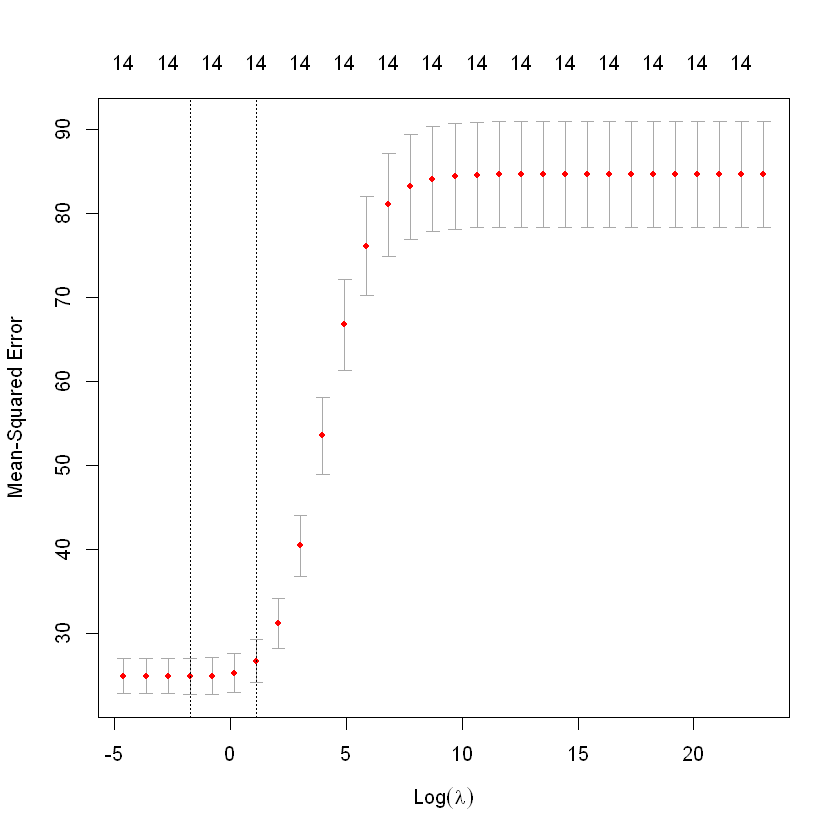

In [36]:
lm_ridge <- glmnet(x, y, alpha = 0, lambda = grid)
summary(lm_ridge)
cv_fit <- cv.glmnet(x, y, alpha = 0, lambda = grid)
plot(cv_fit)

In [37]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.1743329

In [38]:
tss <- sum(y - mean(y)^2)
y_a <- predict(lm_ridge, s = opt_lambda, newx = x)
rss <- sum((y - y_a)^2)
rsq <- 1 - rss/tss
rsq

[1] 1.048576

### 2. Lasso Regression

          Length Class     Mode   
a0         30    -none-    numeric
beta      420    dgCMatrix S4     
df         30    -none-    numeric
dim         2    -none-    numeric
lambda     30    -none-    numeric
dev.ratio  30    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        5    -none-    call   
nobs        1    -none-    numeric

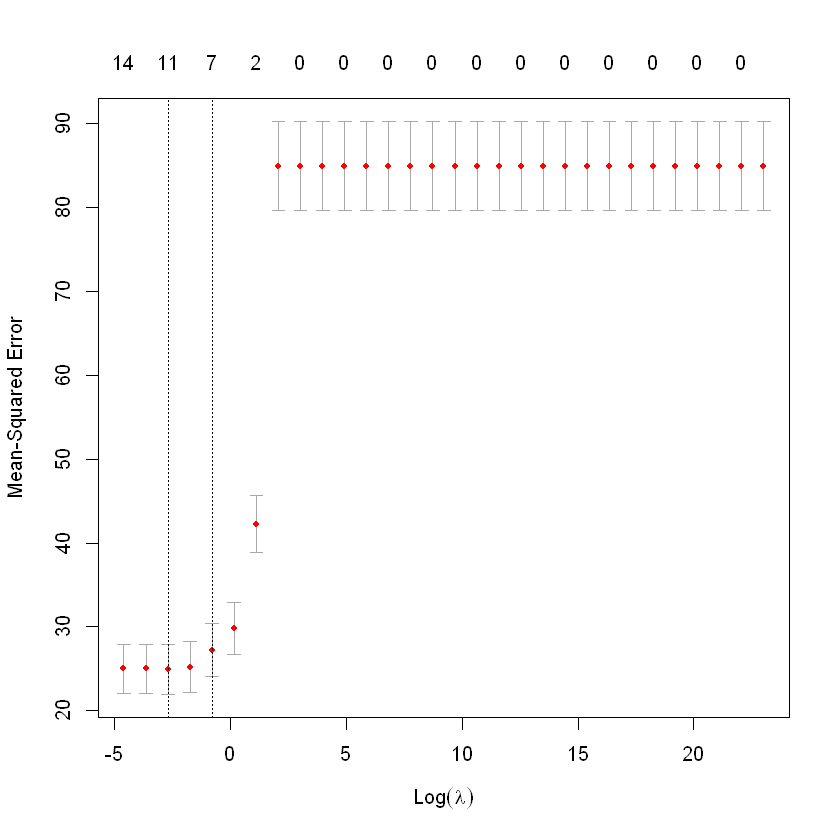

In [39]:
lm_lasso <- glmnet(x, y, alpha = 1, lambda = grid)
summary(lm_lasso)
cv_fit <- cv.glmnet(x, y, alpha = 1, lambda = grid)
plot(cv_fit)

In [40]:
opt_lambda <- cv_fit$lambda.min
opt_lambda

[1] 0.06723358

In [41]:
tss <- sum(y - mean(y)^2)
y_a <- predict(lm_lasso, s = opt_lambda, newx = x)
rss <- sum((y - y_a)^2)
rsq <- 1 - rss/tss
rsq

[1] 1.048785

Hence, Lasso is more suitable for analysis due to less variables